In [2]:
import pandas as pd

# 01. 데이터 클리닝: 완결성 I

결측값이 존재한다? -> 완결성이 떨어진다. 

결측값
- 없는 것이 제일 좋다
- 자주 있다면 원인 파악

In [9]:
df = pd.read_csv('./data/attendance.csv', index_col = 0)
df #NaN(비워져있는 값)이라고 완결성이 떨어진 값이 있다. 

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [10]:
#완결성을 해결하기 isnull메소드
df.isnull() #->NaN인 라벨만 True 다른건 False리턴

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,False,False,False,False,False
2009,False,False,False,False,False
2010,False,False,True,False,False
2011,False,False,False,False,False
2012,False,False,True,False,False
2013,False,False,True,False,False
2014,False,False,False,False,False
2015,False,False,False,False,False
2016,False,False,False,False,False


In [11]:
#######되게 중요해보임###########
df.isnull().sum() #sum메소드를 통해서 결측값이 몇개인지 알 수 있다. 

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

# 02. 데이터 클리닝: 완결성 II



### 결측값이 있을떄 가장 좋은 것은 빈값들을 찾아서 채워넣는것
### 하지만 이게 어렵다면 여러가지 옵션중 결정하는 것이 좋다

### 1. 결측값을 놔둔다.
### 2. 결측값이 있는 레코드를 아예 지워버린다. 
### ->dropna() 메소드 [라벨을 지움]
### ->dropna(axis = 'columns') 메소드 (칼럼을 지움)
### 3.

2. 결측값이 있는 레코드를 아예 지워버리는 dropna()메소드

In [12]:
df.dropna() #->완전히 지워버림 레코드를 하지만 변동안됨  

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [13]:
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [17]:
#inplace=True를 써서 df를 바꿔버릴 수 있다.
df.dropna(inplace = True)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


### 칼럼을 지워보자

In [19]:
df = pd.read_csv('./data/attendance.csv', index_col = 0)
df.dropna(axis = 'columns', inplace = True)
df #->농구 칼럼이 지워짐을 알 수 있다.
#=>데이터를 삭제할땐 어떤 열/행을 지울지 생각해야함

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


### 1. 결측값을 놔둔다. -> fillna()메소드

In [21]:
df = pd.read_csv('./data/attendance.csv', index_col = 0)

In [26]:
#df.fillna(대체할 것)
df.fillna(0) #-> 결측값을 다른 대체로 넣어주는 함수 (0으로 넣어줌)

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,0.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,0.0,4537,1150
2013,11373,7656,0.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [27]:
df.fillna(df.mean()) #->결측값을 그 칼럼에 평균값으로 대체함 

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.000000,4208,1329
2009,11562,10983,1471.000000,4152,1206
2010,11402,12873,1933.857143,3870,705
2011,13055,10709,1774.000000,3955,1445
2012,13747,7157,1933.857143,4537,1150
2013,11373,7656,1933.857143,4092,1237
2014,11429,8115,1967.000000,4458,1417
2015,10357,7720,2311.000000,3953,1480
2016,11583,7854,2336.000000,3543,1425


In [28]:
df.fillna(df.median()) #->결측값들을 그 칼럼의 중간값으로 대체함

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [29]:
#기존데이터프레임을 바꾸고 싶다면 inplace =True 를 하기 
df.fillna(df.median(), inplace= True)

# 03. 스팀 게임 데이터 정리하기
실습 설명
스팀(Steam)은 온라인 게임을 유통하는 플랫폼입니다.  
스팀 플랫폼에서 가장 반응이 좋은 게임이 무엇인지 알아보려고 하는데요.

데이터를 살펴보니 결측값이 있는 것 같네요. 분석에 앞서 결측값을 제거해 봅시다.

결측값이 있는 모든 row를 삭제하고, DataFrame을 출력해 주세요.

주의 사항: 자동 채점 과제입니다. 정답 출력 코드는 print 없이 작성해 주세요. (예시: df)

해설

In [37]:
import pandas as pd 
df = pd.read_csv('./data/steam_1.csv',index_col=0) 
df

,Hours
Name,
The Elder Scrolls V Skyrim,273.0
Fallout 4,87.0
Spore,14.9
Fallout New Vegas,12.1
Left 4 Dead 2,8.9
...,...
Nancy Drew Tomb of the Lost Queen,8.4
Portal 2,8.3
Farm for your Life,8.0


In [38]:
df.isnull().sum() #-> Hours컬럼에 10개의 결측값이 존재 

Hours    10
dtype: int64

In [39]:
df.dropna(inplace= True)
df

,Hours
Name,
The Elder Scrolls V Skyrim,273.0
Fallout 4,87.0
Spore,14.9
Fallout New Vegas,12.1
Left 4 Dead 2,8.9
...,...
Nancy Drew Tomb of the Lost Queen,8.4
Portal 2,8.3
Farm for your Life,8.0


# 04. 데이터 클리닝: 유일성

### 중복되는 데이터가 존재한다 -> '유일성'이 떨어진다
### 즉 같은 데이터가 존재하면 좋지 않다.

In [54]:
df= pd.read_csv('./data/dust.csv', index_col=0)
df.head(3)

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25


In [52]:
df.index

Index(['08월 11일', '08월 10일', '08월 09일', '08월 08일', '08월 07일', '08월 06일',
       '08월 05일', '08월 04일', '08월 03일', '08월 02일', '08월 01일', '07월 31일',
       '07월 31일', '07월 30일', '07월 29일', '07월 28일', '07월 27일', '07월 26일',
       '07월 25일', '07월 24일', '07월 23일', '07월 22일', '07월 21일', '07월 20일',
       '07월 19일', '07월 18일', '07월 17일', '07월 16일', '07월 15일', '07월 14일',
       '07월 13일'],
      dtype='object', name='날짜')

In [55]:
df.index.value_counts() #중복되는게 있는지 확인할 수 있다. 
#-> 07월 31일    2번 나온다

07월 31일    2
08월 11일    1
07월 26일    1
07월 14일    1
07월 15일    1
07월 16일    1
07월 17일    1
07월 18일    1
07월 19일    1
07월 20일    1
07월 21일    1
07월 22일    1
07월 23일    1
07월 24일    1
07월 25일    1
07월 27일    1
08월 10일    1
07월 28일    1
07월 29일    1
07월 30일    1
08월 01일    1
08월 02일    1
08월 03일    1
08월 04일    1
08월 05일    1
08월 06일    1
08월 07일    1
08월 08일    1
08월 09일    1
07월 13일    1
Name: 날짜, dtype: int64

In [56]:
df.loc['07월 31일'] #->실제로 2개이다

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [58]:
#유일성을 해치지 않기 위해 drop_duplication() 메소드로 중복값 제거가능하다. 
df.drop_duplicates().head(4)

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29


In [64]:
#inplace로 중복되는 row를 완벽히 제거하자
df.drop_duplicates(inplace=True)
df.loc['07월 31일']#->이제는 한개만 나옴
 

서울      18
부산      26
대구      17
인천      23
광주      23
대전      17
울산      23
경기      21
강원      19
충북      20
충남      21
전북      21
전남      22
세종      19
경북      22
경남      25
제주      28
강원.1    19
Name: 07월 31일, dtype: int64

In [67]:
#칼럼에 중복을ㄹ 확인해보자.
df.T #T메소드 로우와 컬럼이 바뀜 

날짜,08월 11일,08월 10일,08월 09일,08월 08일,08월 07일,08월 06일,08월 05일,08월 04일,08월 03일,08월 02일,...,07월 22일,07월 21일,07월 20일,07월 19일,07월 18일,07월 17일,07월 16일,07월 15일,07월 14일,07월 13일
서울,7,15,24,26,20,31,27,27,44,40,...,30,37,36,30,35,30,26,22,20,21
부산,17,25,26,25,26,39,36,36,32,26,...,28,37,70,76,55,56,48,49,46,43
대구,15,15,26,28,22,29,25,26,23,20,...,20,41,56,54,42,49,42,21,26,29
인천,10,20,27,26,25,35,31,31,47,41,...,30,30,27,29,36,32,24,22,22,19
광주,29,28,27,29,33,27,27,27,29,26,...,21,48,46,36,39,38,37,23,24,23
대전,12,25,27,31,24,31,24,27,28,19,...,40,57,44,40,42,36,30,18,17,19
울산,12,17,22,20,18,31,30,32,29,20,...,26,42,77,81,66,65,59,55,54,47
경기,9,20,27,26,23,30,27,31,44,39,...,34,38,36,32,36,32,28,23,21,21
강원,16,16,25,29,18,22,25,39,33,25,...,44,51,44,40,39,44,36,25,26,24
충북,14,25,32,33,23,33,31,36,31,24,...,48,59,51,47,47,43,38,24,23,24


In [71]:
df = df.T.drop_duplicates().T #한번더 회전해서 원래대로

In [73]:
df.head(2) #강원도 1개만 남음

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23


# 05. 데이터 클리닝: 정확성 I
### 이상점을 찾아서 제거해주거나 의미있는 정보라면 그냥 둔다.
### 이상점은 아래를 보고 판단

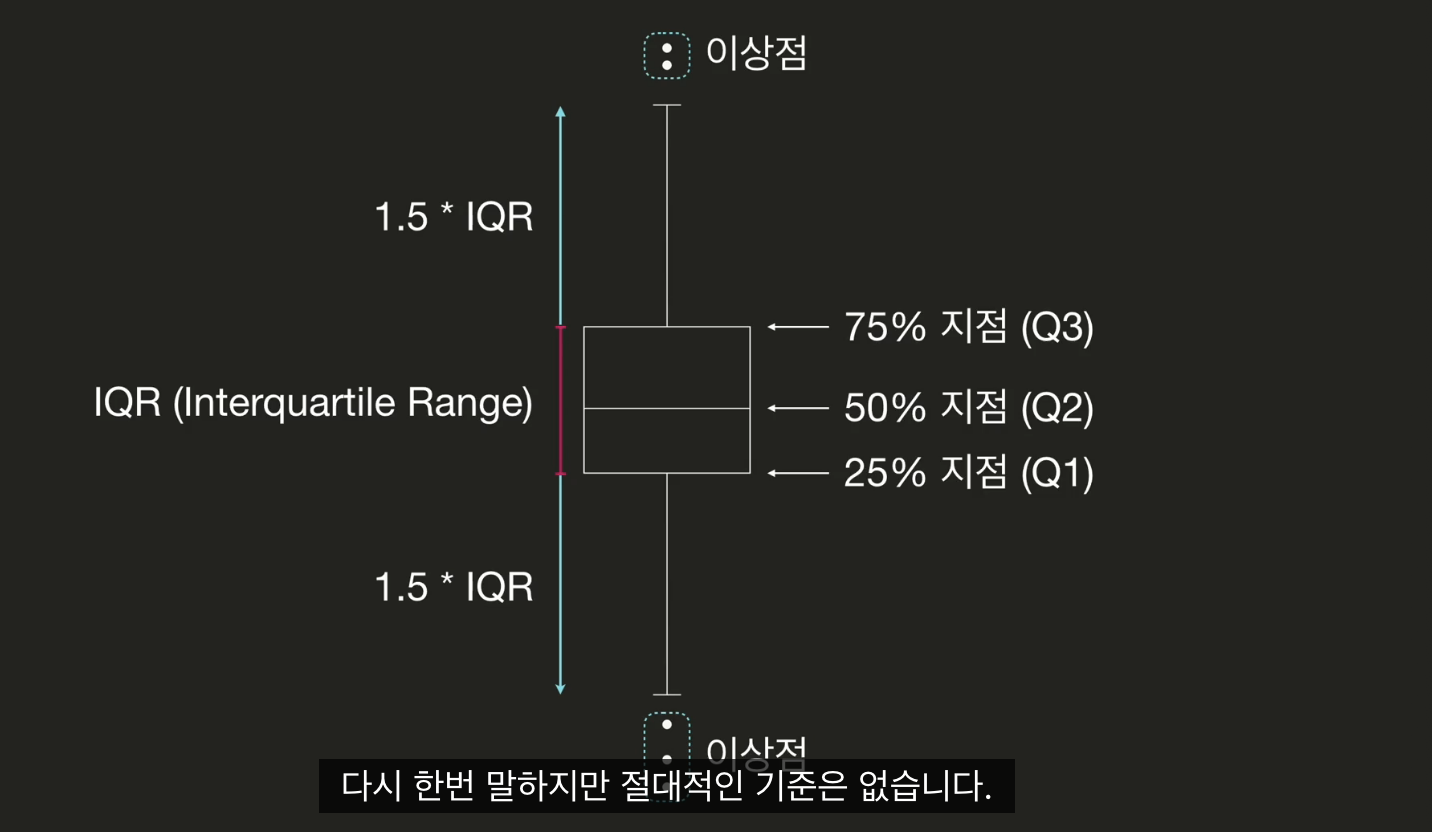

# 06. 데이터 클리닝: 정확성 II

In [76]:
df = pd.read_csv('./data/beer.csv', index_col = 0)
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...
2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


<AxesSubplot: >

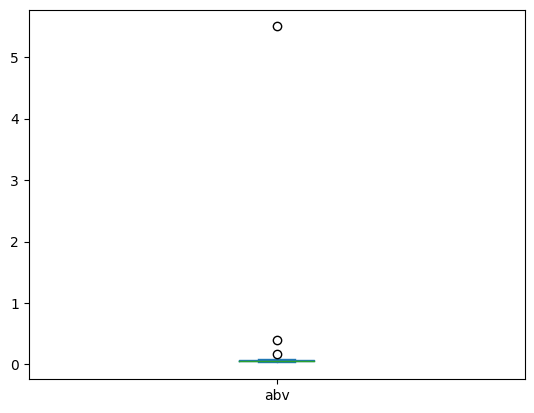

In [78]:
#이상점을 찾아보자
df.plot(kind ='box', y ='abv')
#아래에 몇개의 이상점이 있는 것을 알 수 있다. 이를 이상점에 대한 데이터를 확인해보자

In [80]:
#이상점계산시 IQR= Q3(75%)-Q1(25%이며
#이상점은 Q3|Q1 +|- (IQR*1.5) 이다.
df['abv'].describe()


count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [83]:
#IQR, Q3,Q1구하기 quantile()메소드 사용
Q3 = df['abv'].quantile(0.75)
Q1 = df['abv'].quantile(0.25)
IQR = Q3-Q1

In [85]:
#이제 이상점을 찾아보자. 모두 포함해야하므로 75%,25% 가 아닌 부분을 포함
post = (df['abv'] < Q1-1.5*IQR) | (df['abv'] > Q3+1.5*IQR) 
post #-> boolean값으로 나오니 이를 df에 확인해보자

0       False
1       False
2       False
3       False
4       False
        ...  
2247    False
2248    False
2249    False
2250     True
2251    False
Name: abv, Length: 2252, dtype: bool

In [87]:
df[post] # 3개의 이상점이 나옴을 알 수 있다. 
#index 963,1856은 맥주가아니며, 2250번은 데이터값이 잘 못 기입되었다.
#이를 해결해보자.

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [89]:
df.loc[2250, 'abv'] = 0.055
df[post]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [90]:
#다시 조건식을 써서 확인해보면 이상점이 없어진 것을 알 수 있다.
post = (df['abv'] < Q1-1.5*IQR) | (df['abv'] > Q3+1.5*IQR) 
df[post]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [92]:
#이제는 아예 지우자
df.drop(df[post].index, inplace =True )
df[post] #->아예없어짐을 알 수 있다.

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/277299969.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[post].index, inplace =True )
/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/277299969.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[post] #->아예없어짐을 알 수 있다.


,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot: >

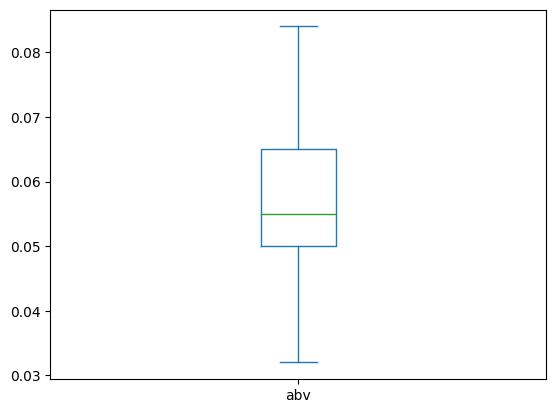

In [94]:
#박스플롯으로 확인해보자
df.plot(kind = 'box', y = 'abv') #-> 이상점이 없어짐을 알 수 있다. 이로인해 정확성이 높아질 수 있다. 

# 07. 데이터 클리닝: 정확성 III

## 관계적 이상점(Relation Outlier)
### 두 변수의 관계를 고려했을때 이상한 데이터

In [96]:
df = pd.read_csv('./data/exam_outlier.csv')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


<AxesSubplot: xlabel='reading score', ylabel='writing score'>

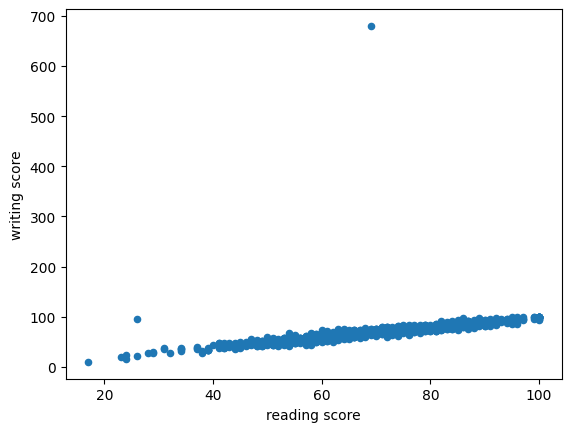

In [98]:
#읽기점수와 쓰기점수의 산점도를 확인해보자
df.plot(kind = 'scatter', x = 'reading score', y = 'writing score' )

In [99]:
#읽기점수와 쓰기점수의 corr()를 확인해보자.
df.corr() #위에보면 700에 가까운 writing score (이상점)이 존재함 이것을 제거해보자

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/22828657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [101]:
df[df['writing score'] > 650]  #-> 9ndex 51번이 나옴을 알 수 있다.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [ ]:
#이를 제거해보면 
df.drop(51, inplace = True)
df[df['writing score'] > 650]  #-> 이제 값안나온다!

In [107]:
#상관계수를 확인해보자
df.corr() #wri-read 사이의 상관계수가 많이 변화한 것을 알 수 있다. 

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/1134852966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #wri-read 사이의 상관계수가 많이 변화한 것을 알 수 있다.


,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [108]:
#상관계수를 확인해보자
df.corr() #wri-read 사이의 상관계수가 많이 변화한 것을 알 수 있다. 

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/1134852966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #wri-read 사이의 상관계수가 많이 변화한 것을 알 수 있다.


,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


<AxesSubplot: xlabel='reading score', ylabel='writing score'>

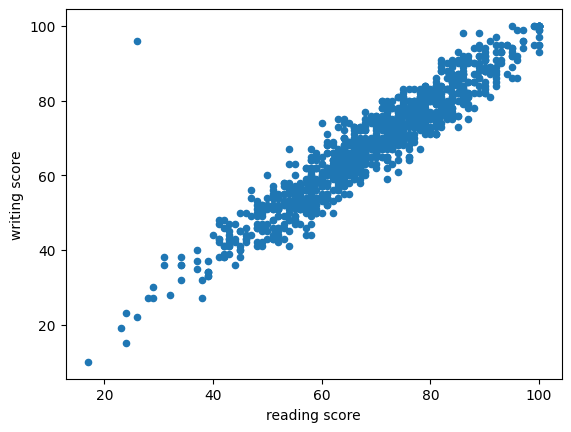

In [105]:
#산점도를 확인해보자
df.plot(kind='scatter', x='reading score', y ='writing score')
#쪼금 안정적이게 되었다. 그래도 writing score 100에 가까운 데이터(readingscore 20에가까운 데이터)가 이상점으로 보인다. 이를 찾자

In [114]:
#그래도 이를 한 번더 확인해보자
pos = df[(df['writing score'] > 90) & (df['reading score'] < 40)] #373 index가 나왔다.
pos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [ ]:
#이제 373번쨰 레이블을 제거해보자 

df.drop(373, inplace= True)


In [118]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# 08. 영화 평점 분석하기 I

실습 설명
영화 감독이 꿈인 래진이는 영화에 대한 데이터 분석을 해보려고 합니다.

movie_metadata.csv에는 영화에 대한 제목, 감독, 배우, 평점, 예산 등의 정보가 있는데요.

과연 예산을 많이 쓰면 소비자 평점이 높아질 지 궁금합니다.

산점도를 그려봤더니, 아주 큰 예산을 쓴 영화 몇 개 때문에 상관 관계를 파악할 수가 없네요.

너무 예산이 큰 일부 영화를 제거하고, 다시 분석해봐야 할 것 같습니다.

예산을 기준으로 75% 지점에서 5 IQR 만큼 더한 것보다 큰 예산의 영화는 제거하고, 다시 산점도를 그려보세요.

In [120]:
df = pd.read_csv('./data/movie_metadata.csv')
df.head()

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143


<AxesSubplot: xlabel='budget', ylabel='imdb_score'>

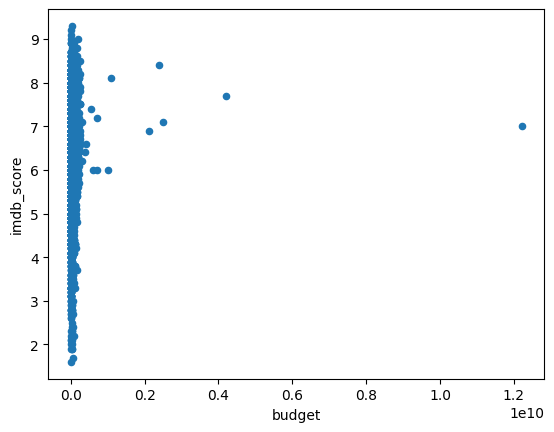

In [121]:
#산점도를 확인해보자(x = 'budget', y = 'imdb_score')
df.plot(kind = 'scatter', x = 'budget', y = 'imdb_score') 
#예산이 큰 영화들떄문에 상관계수를 확인하기 어렵다. 이를 제거해보자. 

In [126]:
df['budget'].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [129]:
Q3 = df['budget'].quantile(0.75)
Q1 = df['budget'].quantile(0.25)

IQR = Q3 - Q1 
post = (df['budget'] > Q3+5*IQR)

df[post]

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,3.000000e+08,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,2.450000e+08,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,2.500000e+08,8.5,164000,106759
5,John Carter,2012.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,English,USA,2.637000e+08,6.6,24000,1873
6,Spider-Man 3,2007.0,Action|Adventure|Romance,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,English,USA,2.580000e+08,6.2,0,46055
7,Tangled,2010.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,English,USA,2.600000e+08,7.8,29000,2036
8,Avengers: Age of Ultron,2015.0,Action|Adventure|Sci-Fi,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,English,USA,2.500000e+08,7.5,118000,92000
9,Harry Potter and the Half-Blood Prince,2009.0,Adventure|Family|Fantasy|Mystery,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,English,UK,2.500000e+08,7.5,10000,58753
10,Batman v Superman: Dawn of Justice,2016.0,Action|Adventure|Sci-Fi,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,English,USA,2.500000e+08,6.9,197000,24450
18,Pirates of the Caribbean: On Stranger Tides,2011.0,Action|Adventure|Fantasy,Rob Marshall,Johnny Depp,Sam Claflin,Stephen Graham,English,USA,2.500000e+08,6.7,58000,54083


In [133]:
df.drop(df[post].index, inplace =True) #지워버리기

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_89625/2562496504.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[post].index, inplace =True)


,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143
11,Superman Returns,2006.0,Action|Adventure|Sci-Fi,Bryan Singer,Kevin Spacey,Marlon Brando,Frank Langella,English,USA,209000000.0,6.1,0,29991
12,Quantum of Solace,2008.0,Action|Adventure,Marc Forster,Giancarlo Giannini,Mathieu Amalric,Rory Kinnear,English,UK,200000000.0,6.7,0,2023
13,Pirates of the Caribbean: Dead Man's Chest,2006.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,225000000.0,7.3,5000,48486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,2013.0,Comedy|Drama,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,English,Canada,NaN,7.7,84,2283
5039,The Following,NaN,Crime|Drama|Mystery|Thriller,NaN,Natalie Zea,Valorie Curry,Sam Underwood,English,USA,NaN,7.5,32000,1753
5040,A Plague So Pleasant,2013.0,Drama|Horror|Thriller,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,English,USA,1400.0,6.3,16,0
5041,Shanghai Calling,2012.0,Comedy|Drama|Romance,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,English,USA,NaN,6.3,660,2386


<AxesSubplot: xlabel='budget', ylabel='imdb_score'>

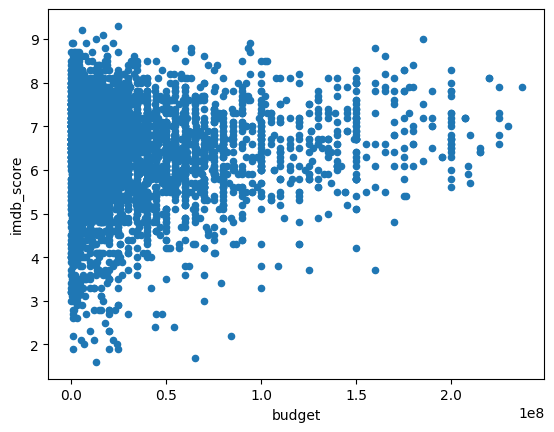

In [134]:
df.plot(kind = 'scatter', x = 'budget', y = 'imdb_score') 
#잘나온다 

# 09. 영화 평점 분석하기 II
실습 설명
이번에도 예산이 너무 큰 영화 몇 개를 제거해보려고 합니다.

하지만 이번에는 IQR이 아니라 예산 상위 15개를 제거하려고 하는데요.

movie_metadata.csv에서 예산이 가장 높은 15개 영화를 제거하고, 산점도를 그려보세요.


In [136]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('./data/movie_metadata.csv')

# 여기에 코드를 작성하세요
df.head()

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,English,USA,237000000.0,7.9,33000,4834
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,English,USA,300000000.0,7.1,0,48350
2,Spectre,2015.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,English,UK,245000000.0,6.8,85000,11700
3,The Dark Knight Rises,2012.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,English,USA,250000000.0,8.5,164000,106759
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,7.1,0,143


In [152]:
sort_df = df.sort_values(by = 'budget', ascending=False)
sort_df

top_15_df = sort_df.head(15) #예산 상위 15개 추출
top_15_df

,title,year,genres,director,actor_1,actor_2,actor_3,language,country,budget,imdb_score,movie_facebook_likes,cast_total_facebook_likes
2988,The Host,2006.0,Comedy|Drama|Horror|Sci-Fi,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,Korean,South Korea,1.221550e+10,7.0,7000,1173
3859,Lady Vengeance,2005.0,Crime|Drama,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,Korean,South Korea,4.200000e+09,7.7,4000,907
3005,Fateless,2005.0,Drama|Romance|War,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,Hungarian,Hungary,2.500000e+09,7.1,607,11
2323,Princess Mononoke,1997.0,Adventure|Animation|Fantasy,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,Japanese,Japan,2.400000e+09,8.4,11000,2710
2334,Steamboy,2004.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,Japanese,Japan,2.127520e+09,6.9,973,991
3423,Akira,1988.0,Action|Animation|Sci-Fi,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,Japanese,Japan,1.100000e+09,8.1,0,28
4542,Godzilla 2000,1999.0,Action|Adventure|Drama|Sci-Fi|Thriller,Takao Okawara,Hiroshi Abe,Naomi Nishida,Sakae Kimura,Japanese,Japan,1.000000e+09,6.0,339,53
3075,Kabhi Alvida Naa Kehna,2006.0,Drama,Karan Johar,Shah Rukh Khan,John Abraham,Preity Zinta,Hindi,India,7.000000e+08,6.0,659,10822
3851,Tango,1998.0,Drama|Musical,Carlos Saura,Mía Maestro,Juan Luis Galiardo,Miguel Ángel Solá,Spanish,Spain,7.000000e+08,7.2,539,371
3273,Kites,2010.0,Action|Drama|Romance|Thriller,Anurag Basu,Bárbara Mori,Steven Michael Quezada,Kabir Bedi,English,India,6.000000e+08,6.0,0,1836


In [154]:
df.drop(top_15_df.index, inplace =True) #지워버리기

<AxesSubplot: xlabel='budget', ylabel='imdb_score'>

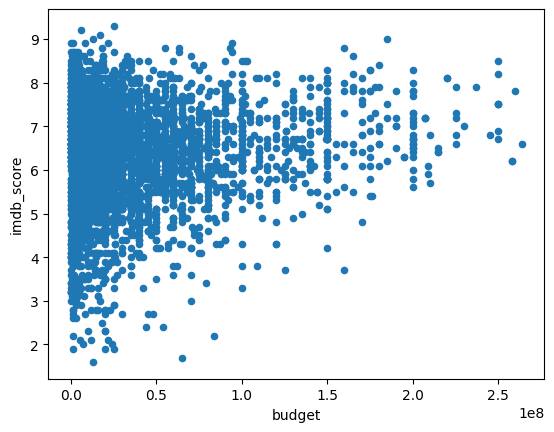

In [155]:
df.plot(kind='scatter', x = 'budget' , y = 'imdb_score')
